# Exercise with bank marketing data

## Introduction

- Data from the UCI Machine Learning Repository: [data](https://github.com/justmarkham/DAT8/blob/master/data/bank-additional.csv), [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal:** Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [2]:
import pandas as pd
data = pd.read_csv('/Users/Matt/githubclones/GA-SEA-DAT1/data/bank-additional.csv', sep=';')
data.head(10)
data.columns
data.describe

<bound method DataFrame.describe of       age            job   marital            education  default  housing  \
0      30    blue-collar   married             basic.9y       no      yes   
1      39       services    single          high.school       no       no   
2      25       services   married          high.school       no      yes   
3      38       services   married             basic.9y       no  unknown   
4      47         admin.   married    university.degree       no      yes   
5      32       services    single    university.degree       no       no   
6      32         admin.    single    university.degree       no      yes   
7      41   entrepreneur   married    university.degree  unknown      yes   
8      31       services  divorced  professional.course       no       no   
9      35    blue-collar   married             basic.9y  unknown       no   
10     25       services    single             basic.6y  unknown      yes   
11     36  self-employed    single      

In [60]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,mappedy,default_no,default_unknown,default_yes,mappedmonth,duration_zerodrop
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374,-0.161427,0.162045,-0.013772,0.048973,NaN
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218,0.418565,0.020140,-0.019799,-0.008921,-0.017243,NaN
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037,-0.076091,-0.021239,0.021377,-0.003260,-0.039843,NaN
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983,-0.332012,-0.089514,0.089433,0.003133,-0.090636,NaN
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853,0.255697,0.092754,-0.093714,0.023291,0.067166,NaN
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173,-0.283216,-0.184389,0.184549,-0.001844,0.035404,NaN
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560,-0.098326,-0.162098,0.162576,-0.010214,-0.149118,NaN
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054,0.054393,-0.021570,0.021781,-0.005091,0.238255,NaN
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589,-0.298565,-0.176800,0.176696,0.004780,0.134545,NaN
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000,-0.349241,-0.167754,0.167589,0.006203,0.093692,NaN


C:\Users\Matt\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


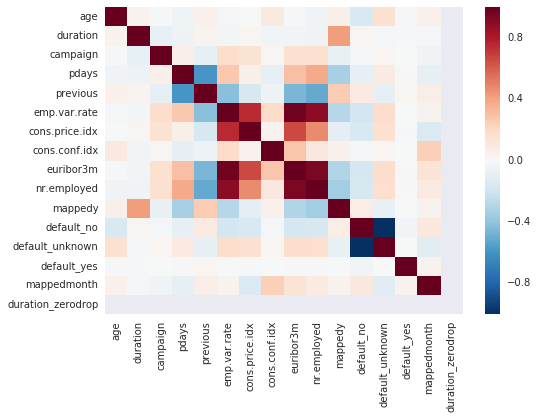

In [61]:
import seaborn as sns
sns.heatmap(data.corr())

## Step 2: Prepare at least three features

- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [3]:
# display all column names (for reference)
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

### y (response)

In [4]:
# The y values are text.  Convert the values to numeric values and store as a new column 
data['mappedy'] = data.y.map({'no':0, 'yes':1})


### Evaluate each feature to see if it will to be useful to try in our model.  Add numerical values or dummy variables for category type features as appropriate

### age

In [12]:
%matplotlib inline

mappedy
0    39.895311
1    41.889135
Name: age, dtype: float64

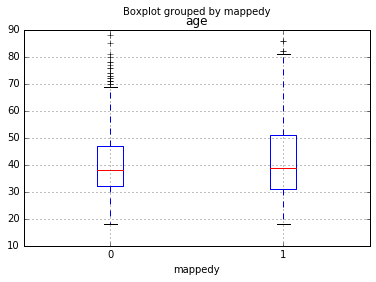

In [41]:
# evaluate the feature
import matplotlib.pyplot as plt
data.boxplot(column='age', by='mappedy')

#data.groupby(['mappedy','age']).describe()
data.groupby('mappedy').age.mean()
# product selectors tend slighly older, but not much

### job

In [ ]:
# evaluate the feature

In [6]:
#data.job.value_counts()
#data[(data.mappedy == 1)].groupby('job').value_counts()
#type(accepted)
#accepted.mean()
#accepted.job.value_counts()
data.groupby('job')['mappedy'].value_counts()
#accepted.groupby('job').value_counts().plot(kind='bar')
#data.groupby(['job']).mappedy.mean()
#accepted.groupby('job').mean().plot(kind='bar')
#data[(data.mappedy == 1)]
#data.groupby()
# job seems to be a relevant attribute

job            mappedy
admin.         0          879
               1          133
blue-collar    0          823
               1           61
entrepreneur   0          140
               1            8
housemaid      0           99
               1           11
management     0          294
               1           30
retired        0          128
               1           38
self-employed  0          146
               1           13
services       0          358
               1           35
student        0           63
               1           19
technician     0          611
               1           80
unemployed     0           92
               1           19
unknown        0           35
               1            4
dtype: int64

### default

In [ ]:
# evaluate the feature

In [7]:
#evaluate counts of 'default' column
data['default'].value_counts()

# create dummies
default_dummies = pd.get_dummies(data.default, prefix='default')
#default_dummies.drop(default_dummies.columns[0], axis=1, inplace=True)
data = pd.concat([data, default_dummies], axis=1)
data.columns
data.describe


<bound method DataFrame.describe of       age            job   marital            education  default  housing  \
0      30    blue-collar   married             basic.9y       no      yes   
1      39       services    single          high.school       no       no   
2      25       services   married          high.school       no      yes   
3      38       services   married             basic.9y       no  unknown   
4      47         admin.   married    university.degree       no      yes   
5      32       services    single    university.degree       no       no   
6      32         admin.    single    university.degree       no      yes   
7      41   entrepreneur   married    university.degree  unknown      yes   
8      31       services  divorced  professional.course       no       no   
9      35    blue-collar   married             basic.9y  unknown       no   
10     25       services    single             basic.6y  unknown      yes   
11     36  self-employed    single      

In [106]:
data.columns


Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'mappedy',
       u'default_no', u'default_unknown', u'default_yes'],
      dtype='object')

In [8]:
data.groupby('mappedy')['default'].value_counts()
# this feature seems somewhat salient - ~20% of no's did select, versus ~5% of those who were unknown
# however, there are not enough yes values to be able to impute plugged values without distorting 

mappedy  default
0        no         2913
         unknown     754
         yes           1
1        no          402
         unknown      49
dtype: int64

### contact

In [ ]:
# evaluate the feature

In [9]:
data.groupby('contact')['mappedy'].value_counts()

contact    mappedy
cellular   0          2277
           1           375
telephone  0          1391
           1            76
dtype: int64

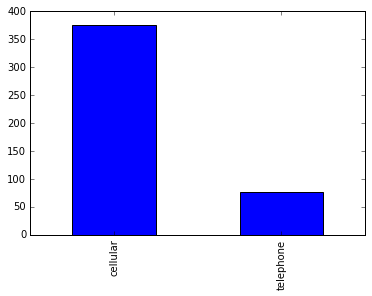

In [120]:
accepted = data[(data.mappedy == 1)]
accepted['contact'].value_counts().plot(kind='bar')


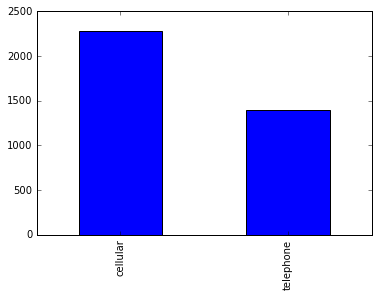

In [121]:
not_accepted = data[(data.mappedy == 0)]
not_accepted['contact'].value_counts().plot(kind='bar')

In [67]:
'''this feature seems somewhat salient - being contacted via mobile seems to make 
a difference to acceptance.

going to convert to dummies to see if there are noticable correlations'''

contact_dummies = pd.get_dummies(data.contact, prefix='contact')
data = pd.concat([data, contact_dummies], axis=1)
data.columns
data.describe

<bound method DataFrame.describe of       age            job   marital            education  default  housing  \
0      30    blue-collar   married             basic.9y       no      yes   
1      39       services    single          high.school       no       no   
2      25       services   married          high.school       no      yes   
3      38       services   married             basic.9y       no  unknown   
4      47         admin.   married    university.degree       no      yes   
5      32       services    single    university.degree       no       no   
6      32         admin.    single    university.degree       no      yes   
7      41   entrepreneur   married    university.degree  unknown      yes   
8      31       services  divorced  professional.course       no       no   
9      35    blue-collar   married             basic.9y  unknown       no   
10     25       services    single             basic.6y  unknown      yes   
11     36  self-employed    single      

In [68]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,default_no,default_unknown,default_yes,mappedmonth,duration_zerodrop,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,...,-0.161427,0.162045,-0.013772,0.048973,NaN,0.009804,-0.031205,0.043341,-0.012700,0.012700
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218,...,0.020140,-0.019799,-0.008921,-0.017243,NaN,-0.003007,-0.021259,0.046154,0.028185,-0.028185
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037,...,-0.021239,0.021377,-0.003260,-0.039843,NaN,-0.079376,0.098957,-0.054564,-0.085654,0.085654
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983,...,-0.089514,0.089433,0.003133,-0.090636,NaN,-0.001093,0.488761,-0.940565,-0.120670,0.120670
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853,...,0.092754,-0.093714,0.023291,0.067166,NaN,0.661990,-0.854241,0.510865,0.215464,-0.215464
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173,...,-0.184389,0.184549,-0.001844,0.035404,NaN,-0.392091,0.482106,-0.256587,-0.383405,0.383405
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560,...,-0.162098,0.162576,-0.010214,-0.149118,NaN,-0.290440,0.289799,-0.060257,-0.574452,0.574452
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054,...,-0.021570,0.021781,-0.005091,0.238255,NaN,-0.163486,0.100217,0.087382,-0.252035,0.252035
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589,...,-0.176800,0.176696,0.004780,0.134545,NaN,-0.399856,0.502340,-0.282272,-0.390313,0.390313
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000,...,-0.167754,0.167589,0.006203,0.093692,NaN,-0.365215,0.508717,-0.354030,-0.261496,0.261496


### month

In [ ]:
# evaluate the feature

In [10]:
data.groupby('month')['mappedy'].value_counts()  

month  mappedy
apr    0           179
       1            36
aug    0           572
       1            64
dec    1            12
       0            10
jul    0           652
       1            59
jun    0           462
       1            68
mar    1            28
       0            20
may    0          1288
       1            90
nov    0           403
       1            43
oct    0            44
       1            25
sep    0            38
       1            26
dtype: int64

In [16]:
data['mappedmonth'] = data.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

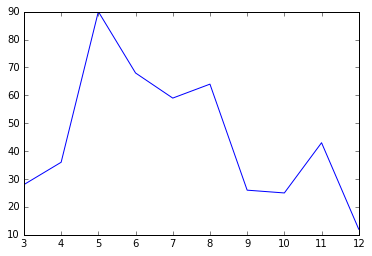

In [21]:
data.mappedmonth.sort_values()
accepted = data[(data.mappedy == 1)]
accepted.mappedmonth.value_counts().sort_index().plot(kind='line')
#accepted['mappedmonth'].value_counts().plot(kind='bar')

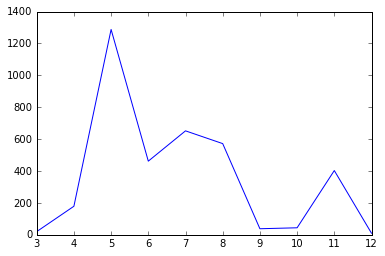

In [22]:
not_accepted = data[(data.mappedy == 0)]
not_accepted.mappedmonth.value_counts().sort_index().plot(kind='line')

In [26]:
#this seems to be a salient feature, with differences in accepted v non-accepted for the last half of the year

### duration

In [31]:
# evaluate the feature
data.groupby('mappedy', sort='True').duration.value_counts().sort_index()


mappedy  duration
0        0            1
         4            1
         5            4
         6            5
         7            4
         8            6
         9            9
         10          10
         11           8
         12           6
         13           6
         14           6
         15           6
         16          11
         17          10
         18           4
         19           9
         20           7
         21           7
         22           9
         23           8
         24           7
         25           5
         26           9
         27           9
         28           3
         29           4
         30           4
         31           8
         32           6
                     ..
1        1190         1
         1203         1
         1207         1
         1234         1
         1276         1
         1298         1
         1311         1
         1319         1
         1327         1
         1332         

In [37]:
data.groupby('mappedy', sort='True').duration.describe()

mappedy       
0        count    3668.000000
         mean      219.409760
         std       198.256347
         min         0.000000
         25%        96.000000
         50%       165.000000
         75%       274.000000
         max      3253.000000
1        count     451.000000
         mean      560.787140
         std       411.537717
         min        63.000000
         25%       255.500000
         50%       458.000000
         75%       761.000000
         max      3643.000000
dtype: float64

In [35]:
duration_zerodrop = data.duration > 0   

In [36]:
data[duration_zerodrop].groupby('mappedy', sort='True').duration.describe()



mappedy       
0        count    3667.000000
         mean      219.469594
         std       198.250260
         min         4.000000
         25%        96.000000
         50%       165.000000
         75%       274.000000
         max      3253.000000
1        count     451.000000
         mean      560.787140
         std       411.537717
         min        63.000000
         25%       255.500000
         50%       458.000000
         75%       761.000000
         max      3643.000000
dtype: float64

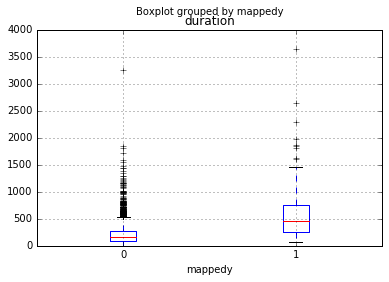

In [42]:
#data[['duration', 'mappedy']].sort('duration', 'mappedy').values
data.boxplot(column='duration', by='mappedy')

In [ ]:
''' duration seems highly salient. but going to follow the advice in the data dictionary and not use, 
since it would result in an over-fit model that would not work well on out of sample data'''

### previous

In [43]:
# evaluate the feature
data.groupby('mappedy', sort='True').previous.describe()

mappedy       
0        count    3668.000000
         mean        0.141767
         std         0.429446
         min         0.000000
         25%         0.000000
         50%         0.000000
         75%         0.000000
         max         6.000000
1        count     451.000000
         mean        0.585366
         std         1.003841
         min         0.000000
         25%         0.000000
         50%         0.000000
         75%         1.000000
         max         6.000000
dtype: float64

In [45]:
data.groupby('mappedy', sort='True').previous.value_counts().sort_index()

mappedy  previous
0        0           3231
         1            376
         2             46
         3             10
         4              4
         6              1
1        0            292
         1             99
         2             32
         3             15
         4             10
         5              2
         6              1
dtype: int64

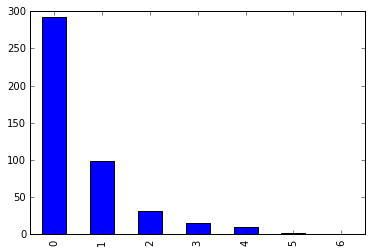

In [46]:
accepted['previous'].value_counts().plot(kind='bar')

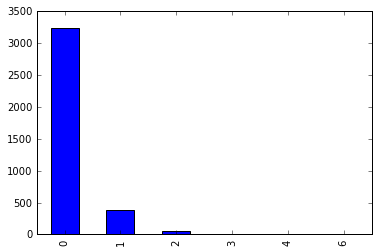

In [47]:
not_accepted['previous'].value_counts().plot(kind='bar')

In [ ]:
#somewhat salient

### poutcome

In [ ]:
# evaluate the feature

In [65]:

data.poutcome.describe()

count            4119
unique              3
top       nonexistent
freq             3523
Name: poutcome, dtype: object

In [66]:
#check for null values
data[data.poutcome.isnull()].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,mappedy,default_no,default_unknown,default_yes,mappedmonth,duration_zerodrop,poutcome_failure,poutcome_nonexistent,poutcome_success
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data.groupby('mappedy', sort='True').poutcome.value_counts()

mappedy  poutcome   
0        nonexistent    3231
         failure         387
         success          50
1        nonexistent     292
         success          92
         failure          67
dtype: int64

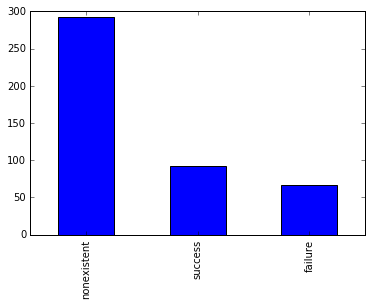

In [51]:
accepted['poutcome'].value_counts().plot(kind='bar')

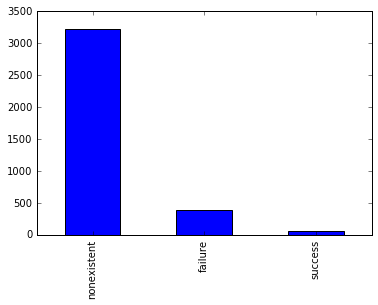

In [52]:
not_accepted['poutcome'].value_counts().plot(kind='bar')

In [62]:
#somewhat salient, going to convert to dummies so I can use it 
poutcome_dummies = pd.get_dummies(data.poutcome, prefix='poutcome')
data = pd.concat([data, poutcome_dummies], axis=1)
data.columns
data.describe

<bound method DataFrame.describe of       age            job   marital            education  default  housing  \
0      30    blue-collar   married             basic.9y       no      yes   
1      39       services    single          high.school       no       no   
2      25       services   married          high.school       no      yes   
3      38       services   married             basic.9y       no  unknown   
4      47         admin.   married    university.degree       no      yes   
5      32       services    single    university.degree       no       no   
6      32         admin.    single    university.degree       no      yes   
7      41   entrepreneur   married    university.degree  unknown      yes   
8      31       services  divorced  professional.course       no       no   
9      35    blue-collar   married             basic.9y  unknown       no   
10     25       services    single             basic.6y  unknown      yes   
11     36  self-employed    single      

In [63]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,mappedy,default_no,default_unknown,default_yes,mappedmonth,duration_zerodrop,poutcome_failure,poutcome_nonexistent,poutcome_success
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374,-0.161427,0.162045,-0.013772,0.048973,NaN,0.009804,-0.031205,0.043341
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218,0.418565,0.020140,-0.019799,-0.008921,-0.017243,NaN,-0.003007,-0.021259,0.046154
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037,-0.076091,-0.021239,0.021377,-0.003260,-0.039843,NaN,-0.079376,0.098957,-0.054564
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983,-0.332012,-0.089514,0.089433,0.003133,-0.090636,NaN,-0.001093,0.488761,-0.940565
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853,0.255697,0.092754,-0.093714,0.023291,0.067166,NaN,0.661990,-0.854241,0.510865
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173,-0.283216,-0.184389,0.184549,-0.001844,0.035404,NaN,-0.392091,0.482106,-0.256587
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560,-0.098326,-0.162098,0.162576,-0.010214,-0.149118,NaN,-0.290440,0.289799,-0.060257
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054,0.054393,-0.021570,0.021781,-0.005091,0.238255,NaN,-0.163486,0.100217,0.087382
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589,-0.298565,-0.176800,0.176696,0.004780,0.134545,NaN,-0.399856,0.502340,-0.282272
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000,-0.349241,-0.167754,0.167589,0.006203,0.093692,NaN,-0.365215,0.508717,-0.354030


### euribor3m

In [ ]:
# evaluate the feature

In [56]:
data[data.euribor3m.isnull()].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,mappedy,default_no,default_unknown,default_yes,mappedmonth,duration_zerodrop
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
data.euribor3m.describe()

count    4119.000000
mean        3.621356
std         1.733591
min         0.635000
25%         1.334000
50%         4.857000
75%         4.961000
max         5.045000
Name: euribor3m, dtype: float64

In [58]:
accepted.euribor3m.describe()

count    451.000000
mean       2.145448
std        1.769719
min        0.635000
25%        0.846000
50%        1.262000
75%        4.855000
max        4.970000
Name: euribor3m, dtype: float64

In [59]:
not_accepted.euribor3m.describe()

count    3668.000000
mean        3.802826
std         1.640054
min         0.635000
25%         1.405000
50%         4.857000
75%         4.962000
max         5.045000
Name: euribor3m, dtype: float64

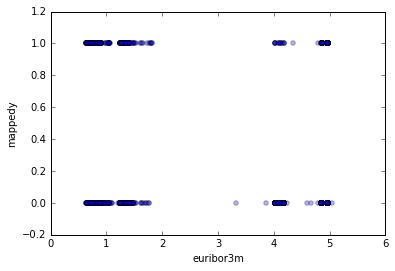

In [53]:
data.plot(kind='scatter', x='euribor3m', y='mappedy', alpha=0.3)

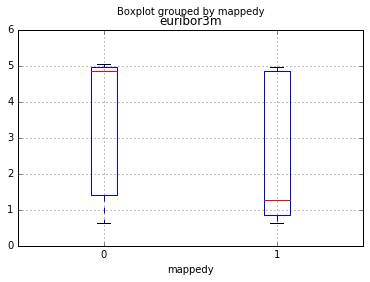

In [54]:
data.boxplot(column='euribor3m', by='mappedy')

In [ ]:
'''unsurprisingly, this attribute is very salient.
lower interest rates seem to be correlated with acceptance of the product'''

## Step 3: Model building

- Use cross-validation to evaluate the AUC of a logistic regression model with your chosen features
- Try to increase the AUC by selecting different sets of features

In [71]:
# going to use euribor3m, previous, poutcome, and contact
# first need to drop some extraneous columns created 
data.columns


Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'mappedy',
       u'default_no', u'default_unknown', u'default_yes', u'mappedmonth',
       u'duration_zerodrop', u'poutcome_failure', u'poutcome_nonexistent',
       u'poutcome_success', u'contact_cellular', u'contact_telephone'],
      dtype='object')

In [72]:
# dropping contact_telephone and poutcome_nonexistent
data.drop(data.columns[31], axis=1, inplace=True)
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'mappedy',
       u'default_no', u'default_unknown', u'default_yes', u'mappedmonth',
       u'duration_zerodrop', u'poutcome_failure', u'poutcome_nonexistent',
       u'poutcome_success', u'contact_cellular'],
      dtype='object')

In [73]:
data.drop(data.columns[28], axis=1, inplace=True)
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'mappedy',
       u'default_no', u'default_unknown', u'default_yes', u'mappedmonth',
       u'duration_zerodrop', u'poutcome_failure', u'poutcome_success',
       u'contact_cellular'],
      dtype='object')

In [90]:
# define X and y
feature_cols = ['euribor3m', 'previous', 'poutcome_failure', 'poutcome_success', 'mappedmonth']
X = data[feature_cols]
y = data.mappedy

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.908737864078


In [91]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[ 0.31055044  0.05661859  0.63165965 ...,  0.13566569  0.04316933
  0.04923373]


0.77726344086


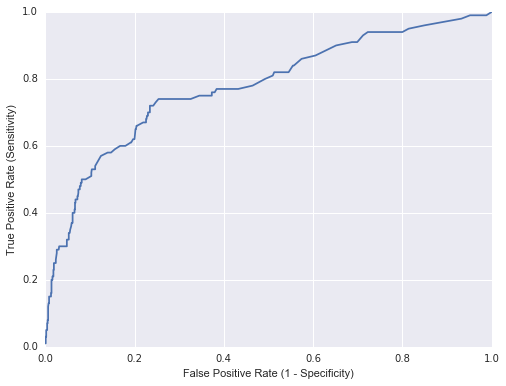

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#print(metrics.roc_curve(y_test, y_pred_prob))

# calculate AUC
print metrics.roc_auc_score(y_test, y_pred_prob)

In [93]:
# calculate cross-validated AUC on current set of features
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.76267489284347867

In [94]:
# Evaluate adding other features. (Adding contact_cellular back into the model)
feature_cols = ['euribor3m', 'previous', 'poutcome_failure', 'poutcome_success', 'mappedmonth', 'contact_cellular']
X = data[feature_cols]

# recalculate AUC
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.76303849923829303